# LLM-assisted Automatic Story Illustrator

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/soumik12345/diffusion-story-illustration/blob/main/examples/hosted_illustrate.ipynb)

This notebook demonstrates using the simple LLM-assisted automatic story illustration workflow implemented in [github.com/soumik12345/diffusion-story-illustration](https://github.com/soumik12345/diffusion-story-illustration). To learn more about the details of this workflow, please refer to the W&B report: [Building a GenAI-assisted automatic story illustrator](https://wandb.ai/geekyrakshit/story-illustration/reports/Building-a-GenAI-assisted-Automatic-Story-Illustrator--Vmlldzo5MTYxNTkw)

In [1]:
!pip install -qU rich

In [6]:
import base64
import io
import requests
import os
import rich
from getpass import getpass
from PIL import Image

We are hosting the workflow for you to try out with just a few lines of python code. All you need is a **WandB API Key** which you can get from [wandb.ai/authorize](https://wandb.ai/authorize).

In [3]:
URL = "http://195.242.25.198:8020/illustrate/story"
WANDB_API_KEY = getpass("Enter your WandB API Key:")

Enter your WandB API Key:··········


In [4]:
illustrator_payload = dict(
    story="Once upon a time, in a land far, far away, there was a little girl named Alice. Alice loved to explore the world around her. One day, she decided to go on an adventure to find the most beautiful flower in the world. Alice traveled through forests, over mountains, and across rivers. She met many interesting creatures along the way, like a friendly dragon and a wise old owl. After a long journey, Alice finally found the most beautiful flower in the world. She picked it and brought it back to her home. From that day on, Alice knew that with courage and determination, she could achieve anything.",
    story_title="Alice's Flower Adventure",
    story_author="A.A. Milne",
    story_setting="A magical land filled with talking animals and enchanted creatures",
)

When you run this code, you will recieve a [weave](https://weave-docs.wandb.ai/) trace, which you can use to explore the images and the detailed trace of the entire workflow.

In [9]:
response = requests.post(
    URL, headers={"wandb-api-key": WANDB_API_KEY},
    json=illustrator_payload
).json()
rich.print(response["weave_trace"])

https://wandb.ai/geekyrakshit/illustration-project/r/call/01920ac5-fac3-7693-8489-bb2ba6e3a9f5

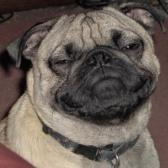

In [10]:
Image.open(io.BytesIO(base64.b64decode(response["images"]["image_0"])))